In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
%matplotlib inline

In [3]:
df = pd.read_csv("data/accidentInfoList.csv",encoding="cp949")
df.shape

(35227, 22)

In [4]:
df.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [5]:
df["시군구"]

0             서울특별시 양천구 목동
1            서울특별시 노원구 월계동
2            서울특별시 용산구 한남동
3        서울특별시 영등포구 영등포동3가
4            서울특별시 구로구 구로동
               ...        
35222       서울특별시 동대문구 제기동
35223        서울특별시 강동구 강일동
35224        서울특별시 강남구 삼성동
35225        서울특별시 송파구 신천동
35226        서울특별시 양천구 신월동
Name: 시군구, Length: 35227, dtype: object

In [6]:
c = df["시군구"].value_counts()
c
# 기본적으로 어느 지역에서 가장 많은 사고가 있었는지 (동 단위)

서울특별시 강남구 역삼동     826
서울특별시 관악구 신림동     763
서울특별시 서초구 서초동     658
서울특별시 강서구 화곡동     626
서울특별시 노원구 상계동     619
                 ... 
서울특별시 중구 인현동1가      1
서울특별시 중구 남학동        1
서울특별시 종로구 사간동       1
서울특별시 서대문구 옥천동      1
서울특별시 종로구 팔판동       1
Name: 시군구, Length: 456, dtype: int64

In [7]:
df_top = df.groupby('시군구').filter(lambda x : len(x)>300)
df_top

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2020010100100001,2020년 1월 1일 00시,수요일,서울특별시 양천구 목동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,이륜,남,56세,상해없음,보행자,남,25세,경상
4,2020010100100017,2020년 1월 1일 01시,수요일,서울특별시 구로구 구로동,중상사고,0,2,3,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,남,23세,상해없음,보행자,남,46세,중상
5,2020010100100018,2020년 1월 1일 01시,수요일,서울특별시 강서구 화곡동,중상사고,0,2,2,0,차대차 - 기타,...,기타,단일로 - 기타,승용,남,40세,상해없음,승용,남,71세,중상
6,2020010100100019,2020년 1월 1일 01시,수요일,서울특별시 양천구 신월동,경상사고,0,0,3,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승용,남,51세,상해없음,승용,남,35세,경상
7,2020010100100020,2020년 1월 1일 01시,수요일,서울특별시 노원구 상계동,경상사고,0,0,4,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,48세,경상,승용,남,39세,상해없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35217,2020123100100528,2020년 12월 31일 21시,목요일,서울특별시 강서구 화곡동,중상사고,0,1,0,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,원동기,남,18세,중상,승용,남,52세,상해없음
35218,2020123100100529,2020년 12월 31일 21시,목요일,서울특별시 강동구 천호동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,70세,상해없음,승용,남,25세,경상
35219,2020123100100530,2020년 12월 31일 21시,목요일,서울특별시 송파구 잠실동,중상사고,0,2,0,0,차대차 - 추돌,...,맑음,단일로 - 교량,승용,남,46세,상해없음,승용,여,47세,중상
35224,2020123100100591,2020년 12월 31일 23시,목요일,서울특별시 강남구 삼성동,경상사고,0,0,2,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승용,남,55세,기타불명,승용,남,29세,경상


In [9]:
t = df_top["시군구"].value_counts()
t

서울특별시 강남구 역삼동      826
서울특별시 관악구 신림동      763
서울특별시 서초구 서초동      658
서울특별시 강서구 화곡동      626
서울특별시 노원구 상계동      619
서울특별시 관악구 봉천동      605
서울특별시 강남구 논현동      578
서울특별시 구로구 구로동      535
서울특별시 중랑구 면목동      532
서울특별시 양천구 목동       523
서울특별시 강북구 미아동      468
서울특별시 서초구 반포동      465
서울특별시 강남구 대치동      449
서울특별시 양천구 신정동      428
서울특별시 송파구 잠실동      413
서울특별시 강북구 수유동      404
서울특별시 양천구 신월동      393
서울특별시 송파구 가락동      374
서울특별시 금천구 독산동      366
서울특별시 강남구 삼성동      364
서울특별시 서초구 방배동      361
서울특별시 영등포구 여의도동    352
서울특별시 서초구 양재동      352
서울특별시 노원구 공릉동      333
서울특별시 강동구 천호동      327
서울특별시 동대문구 장안동     327
서울특별시 강남구 신사동      323
서울특별시 영등포구 신길동     301
서울특별시 송파구 방이동      301
Name: 시군구, dtype: int64

<AxesSubplot:>

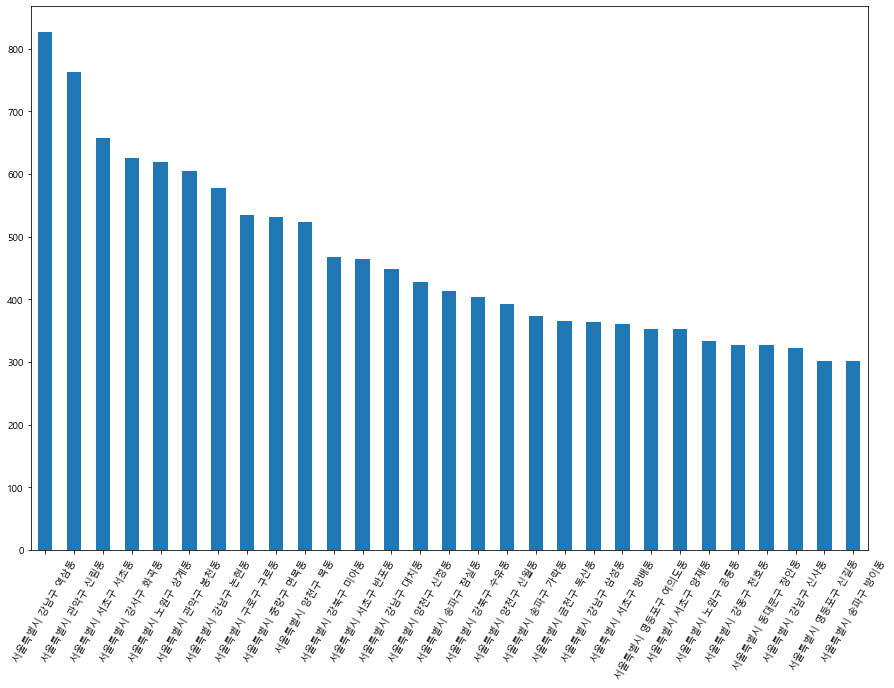

In [15]:
plt.figure(figsize=(15,10))
t.plot.bar(rot=60)